In [10]:
install.packages("party")

Installing package into 'C:/Users/AndriiHura/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'party' is in use and will not be installed"Installing package into 'C:/Users/AndriiHura/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'cluster.datasets' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AndriiHura\AppData\Local\Temp\RtmpQZA0rK\downloaded_packages


In [57]:
install.packages("rpart.plot")

Installing package into 'C:/Users/AndriiHura/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AndriiHura\AppData\Local\Temp\RtmpQZA0rK\downloaded_packages


In [11]:
install.packages(c("cluster.datasets"), dependencies = TRUE)

Installing package into 'C:/Users/AndriiHura/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'cluster.datasets' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AndriiHura\AppData\Local\Temp\RtmpQZA0rK\downloaded_packages


In [13]:
# Load the party package. It will automatically load other
# dependent packages.
library(party)
library(cluster.datasets)


# Print some records from data set readingSkills.
print(head(readingSkills))

  nativeSpeaker age shoeSize    score
1           yes   5 24.83189 32.29385
2           yes   6 25.95238 36.63105
3            no  11 30.42170 49.60593
4           yes   7 28.66450 40.28456
5           yes  11 31.88207 55.46085
6           yes  10 30.07843 52.83124


In [46]:

# Create the input data frame.
input.dat <- readingSkills[c(1:105),]

# Give the chart file a name.
png(file = "decision_tree.png")

# Create the tree.
  output.tree <- ctree(
  nativeSpeaker ~ age + shoeSize + score, 
  data = input.dat)

# Plot the tree.
plot(output.tree)

# Save the file.
dev.off()

png 
  2

In [29]:
df <- read.csv("zoo.csv")


In [33]:
head(df)

animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [35]:
head(readingSkills)

nativeSpeaker,age,shoeSize,score
yes,5,24.83189,32.29385
yes,6,25.95238,36.63105
no,11,30.42170,49.60593
yes,7,28.66450,40.28456
yes,11,31.88207,55.46085
yes,10,30.07843,52.83124


In [44]:

# Create the input data frame.
input.dat <- df[c(1:70),]

# Give the chart file a name.
png(file = "decision_tree.png")

# Create the tree.
  output.tree <- ctree(
  class_type ~ hair + feathers + eggs + milk + airborne + aquatic+ 
      predator +toothed+ backbone + breathes + venomous+fins+
      legs +domestic+catsize , 
  data = input.dat)

# Plot the tree.
plot(output.tree)

# Save the file.
dev.off()

png 
  2

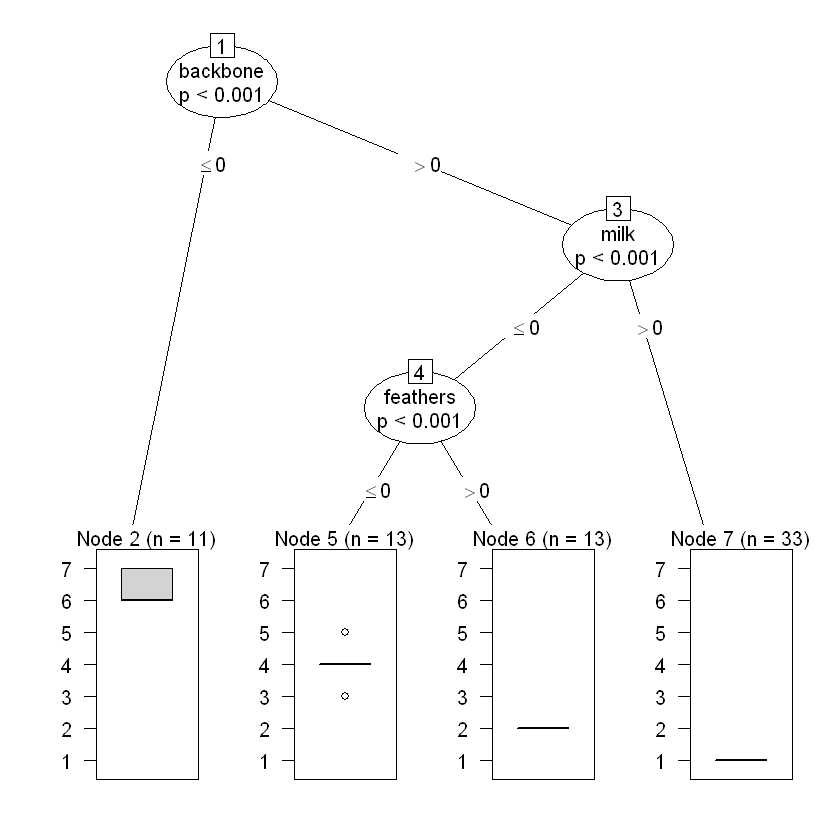

In [45]:
plot(output.tree)


# Iris dataset

In [48]:
iris_ctree<-ctree(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,
                  data = iris)

print(iris_ctree)


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  150 

1) Petal.Length <= 1.9; criterion = 1, statistic = 140.264
  2)*  weights = 50 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.7; criterion = 1, statistic = 67.894
    4) Petal.Length <= 4.8; criterion = 0.999, statistic = 13.865
      5)*  weights = 46 
    4) Petal.Length > 4.8
      6)*  weights = 8 
  3) Petal.Width > 1.7
    7)*  weights = 46 


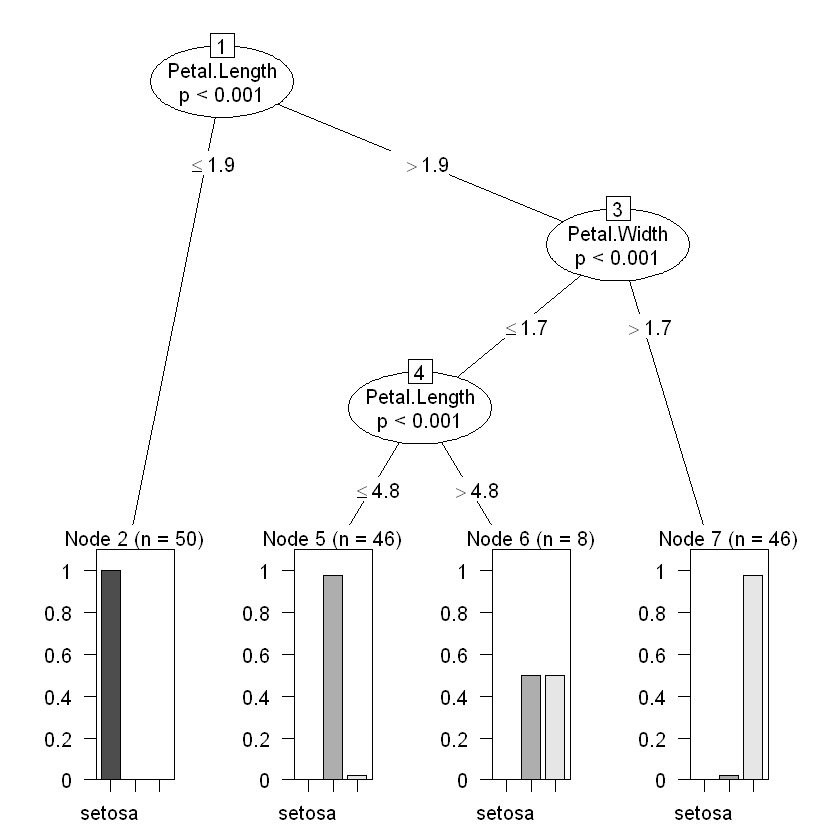

In [49]:
plot(iris_ctree)


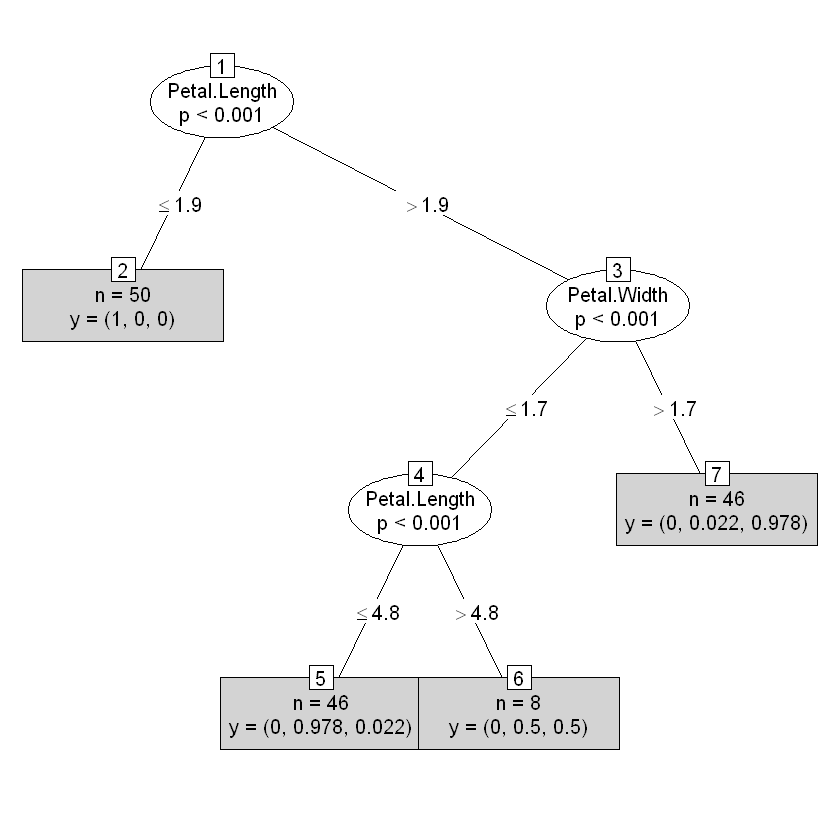

In [50]:
plot(iris_ctree,type = "simple")


In [58]:
library(rpart)
library(rpart.plot)

In [55]:
# fit<-rpart(iris ~  Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,
#            method = "class",
#            data = iris,
#            control = rpart.control(cp=0.005, minsplit = 2),
#            parms = list(split="gini"))
# printcp(fit)

[1] 0.9333333

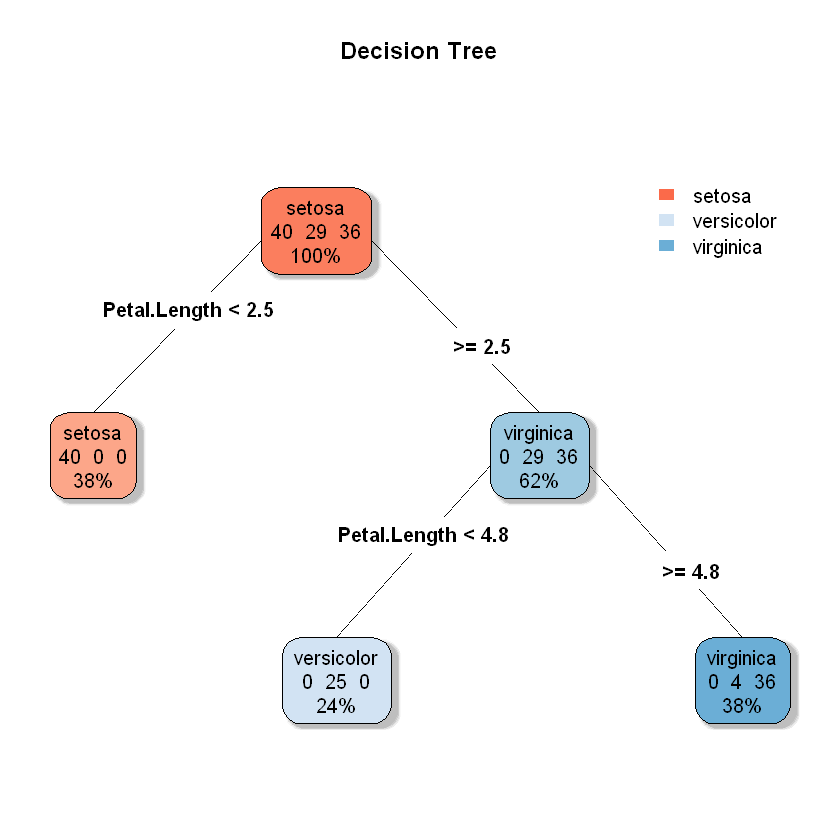

In [59]:

s<-sample(nrow(iris))
iris<-iris[s,]
train<-iris[1:(nrow(iris)*0.7),]
test<-iris[-1:(-nrow(iris)*0.7),]
tree<-rpart(Species~.,data=train,method='class',
            parms=list(split="information"))
rpart.plot(tree,box.palette = "RdBu",shadow.col = "gray",type=4,extra=101
           ,fallen.leaves = FALSE,main="Decision Tree")
pred<-predict(tree,test,type="class")
t<-table(test[,5],pred)
acc<-sum(diag(t))/sum(t)
acc

ERROR: Error in `[.data.frame`(testZoo, , 17): undefined columns selected


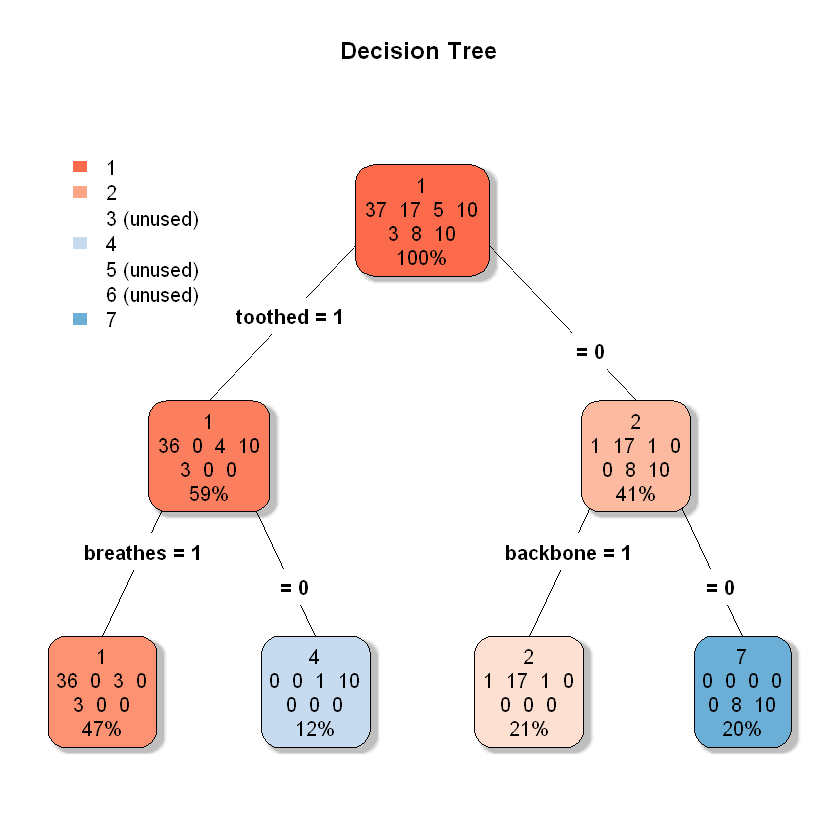

In [65]:
sZoo<-sample(nrow(df))
df<-df[sZoo,2:ncol(df)]
# df
trainZoo<-df[1:(nrow(df)*0.9),]
testZoo<-df[-1:(-nrow(df)*0.9),]
# trainZoo
treeZoo<-rpart(class_type~.,data=trainZoo,method='class',parms=list(split="information"))
rpart.plot(treeZoo,box.palette = "RdBu",shadow.col = "gray",type=4,extra=101
           ,fallen.leaves = FALSE,main="Decision Tree")
predZoo<-predict(treeZoo,testZoo,type="class")
tZoo<-table(testZoo[,17],predZoo)
accZoo<-sum(diag(tZoo))/sum(tZoo)
# accZoo